In [29]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [58]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
a=zip(train_X, train_Y)

for (i,j) in a:
    print(i,j)

3.3 1.7
4.4 2.76
5.5 2.09
6.71 3.19
6.93 1.694
4.168 1.573
9.779 3.366
6.182 2.596
7.59 2.53
2.167 1.221
7.042 2.827
10.791 3.465
5.313 1.65
7.997 2.904
5.654 2.42
9.27 2.94
3.1 1.3


In [42]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")
numpy.random.randn()

0.27248342604136494

In [43]:
#Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [44]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#help(tf.pow)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [45]:
init = tf.global_variables_initializer()

Epoch: 0050 cost=0.197064668 W=0.443341 b=-0.592340
Epoch: 0100 cost=0.183190539 W=0.431818 b=-0.509445
Epoch: 0150 cost=0.170918614 W=0.420980 b=-0.431479
Epoch: 0200 cost=0.160063863 W=0.410787 b=-0.358149
Epoch: 0250 cost=0.150462762 W=0.401200 b=-0.289181
Epoch: 0300 cost=0.141970545 W=0.392184 b=-0.224316
Epoch: 0350 cost=0.134459153 W=0.383703 b=-0.163308
Epoch: 0400 cost=0.127815455 W=0.375727 b=-0.105928
Epoch: 0450 cost=0.121939130 W=0.368225 b=-0.051961
Epoch: 0500 cost=0.116741642 W=0.361170 b=-0.001203
Epoch: 0550 cost=0.112144567 W=0.354534 b=0.046535
Epoch: 0600 cost=0.108078621 W=0.348292 b=0.091435
Epoch: 0650 cost=0.104482479 W=0.342422 b=0.133663
Epoch: 0700 cost=0.101301856 W=0.336901 b=0.173381
Epoch: 0750 cost=0.098488756 W=0.331709 b=0.210736
Epoch: 0800 cost=0.096000805 W=0.326825 b=0.245869
Epoch: 0850 cost=0.093800381 W=0.322232 b=0.278913
Epoch: 0900 cost=0.091854267 W=0.317911 b=0.309992
Epoch: 0950 cost=0.090133116 W=0.313848 b=0.339222
Epoch: 1000 cost=0.08

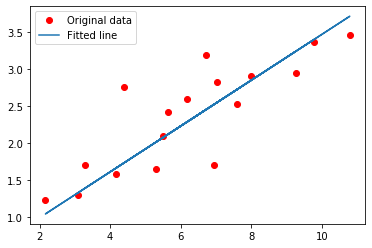

In [53]:
with tf.Session() as sess:
    sess.run(init)
    
    #Fit all training data
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        #display logs per epoch step
        if(epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X,Y:train_Y})
            print("Epoch: %04d cost=%.9f W=%f b=%f" %(epoch+1, c, sess.run(W), sess.run(b)))
            
    print("optimization finished!")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print("Training cost=%f, W=%f, b=%f" % (training_cost, sess.run(W), sess.run(b)))
    
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [40]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.

